In [10]:
import os                   
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', linewidth=0.5, edgecolor='black', facecolor='whitesmoke')

In [11]:
# vvel file names
vvel_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'
#load data
ds_vvel = xr.open_dataset(vvel_annual).roll(nlon=+100)
ds_sigma = xr.open_dataset(sigma_annual).roll(nlon=+100)

# chnage units from cm to m
ds_vvel['VVEL'] = ds_vvel.VVEL *1e-2
ds_vvel['VVEL'].attrs['units'] = 'm/s'

In [12]:
ds_vvel_clim = ds_vvel.isel(time=slice(0, 40)).mean('time')
ds_sigma_clim = ds_sigma.isel(time=slice(0, 40)).mean('time')

In [56]:
vmin, vmax = -0.04,0.04 

# For upper range

In [41]:
# Define the value range
min_value = 36.20
max_value = 36.30

# Check for NaN values in SIGMA_2 and replace them if necessary
ds_sigma_clim['SIGMA_2'] = ds_sigma_clim['SIGMA_2'].fillna(0)

# Create a mask where SIGMA_2 values are within the specified range
mask = (ds_sigma_clim['SIGMA_2'] >= min_value) & (ds_sigma_clim['SIGMA_2'] <= max_value)

# Use the mask to find the indices
indices_in_range = xr.where(mask, True, False)

In [42]:
replacement_value = 0
ds_vvel['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_vvel['TLAT']), np.isinf(ds_vvel['TLAT']) | np.ma.getmask(ds_vvel['TLAT'])),
    replacement_value,
    ds_vvel['TLAT'])

ds_vvel['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_vvel['TLONG']), np.isinf(ds_vvel['TLONG']) | np.ma.getmask(ds_vvel['TLONG'])),
    replacement_value,
    ds_vvel['TLONG'])

In [43]:
ds_anom = ds_vvel - ds_vvel.isel(time=slice(0,40)).mean('time')

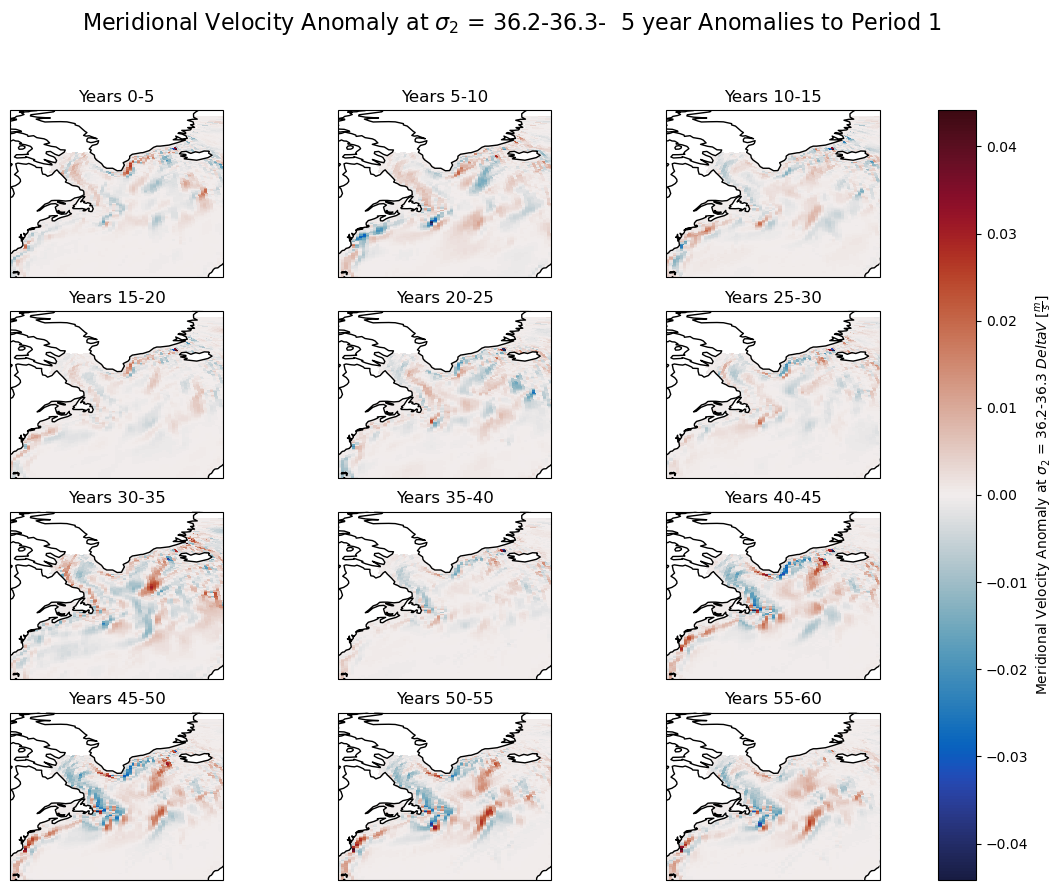

In [44]:
label=r'Meridional Velocity Anomaly at $\sigma_2$ = '+str(min_value)+'-'+str(max_value)+r' $Delta V$ [$\frac{m}{s}$]'

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):

    pc = ds_anom['VVEL'].isel(time=range(i * 5, i * 5 + 5)).mean(dim=['time', 'z_t']).plot.pcolormesh(ax=ax, 
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    x='TLONG', 
                                                                                    y='TLAT',
                                                                                    cmap=cmo.balance,
                                                                                    vmin = vmin, vmax = vmax,
                                                                                    add_colorbar=False,) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
    ax.coastlines()

cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=label)

fig.suptitle(r'Meridional Velocity Anomaly at $\sigma_2$ = '+str(min_value)+'-'+str(max_value)+'-  5 year Anomalies to Period 1', fontsize=16)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'upper_VVEL_5year_anomalies.png', bbox_inches='tight', dpi=300)    

# For lower range

In [49]:
# Define the value range
min_value = 36.58
max_value = 36.68

# Check for NaN values in SIGMA_2 and replace them if necessary
ds_sigma_clim['SIGMA_2'] = ds_sigma_clim['SIGMA_2'].fillna(0)

# Create a mask where SIGMA_2 values are within the specified range
mask = (ds_sigma_clim['SIGMA_2'] >= min_value) & (ds_sigma_clim['SIGMA_2'] <= max_value)

# Use the mask to find the indices
indices_in_range = xr.where(mask, True, False)

In [50]:
replacement_value = 0
ds_vvel['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_vvel['TLAT']), np.isinf(ds_vvel['TLAT']) | np.ma.getmask(ds_vvel['TLAT'])),
    replacement_value,
    ds_vvel['TLAT'])

ds_vvel['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_vvel['TLONG']), np.isinf(ds_vvel['TLONG']) | np.ma.getmask(ds_vvel['TLONG'])),
    replacement_value,
    ds_vvel['TLONG'])

In [51]:
ds_anom = ds_vvel - ds_vvel.isel(time=slice(0,40)).mean('time')

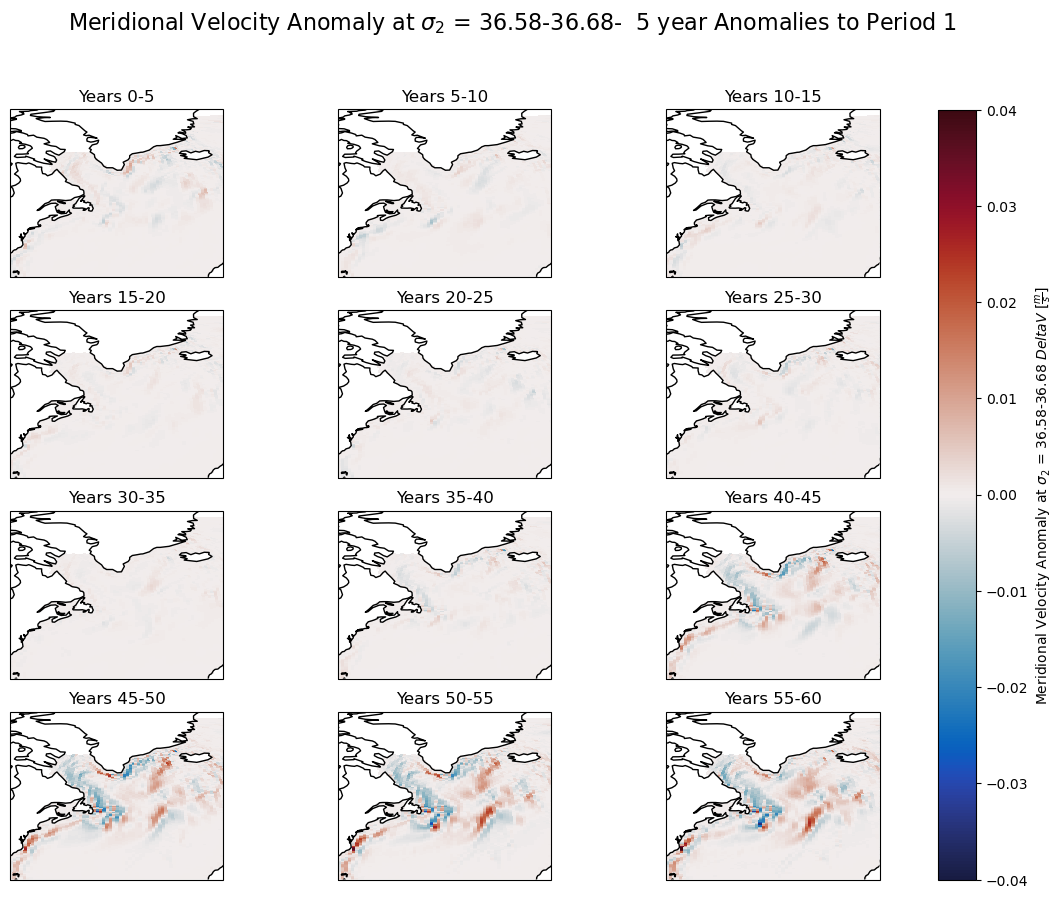

In [57]:
label=r'Meridional Velocity Anomaly at $\sigma_2$ = '+str(min_value)+'-'+str(max_value)+r' $Delta V$ [$\frac{m}{s}$]'

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through the subplots and plot the data
for i, ax in enumerate(axes.flatten()):

    pc = ds_anom['VVEL'].isel(time=range(i * 5, i * 5 + 5)).mean(dim=['time', 'z_t']).plot.pcolormesh(ax=ax, 
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    x='TLONG', 
                                                                                    y='TLAT',
                                                                                    cmap=cmo.balance,
                                                                                    vmin = vmin, vmax = vmax,
                                                                                    add_colorbar=False,) 
    ax.set_extent([-80,-10, 25, 80], crs=ccrs.PlateCarree())
    ax.set_title(f"Years {(i*5)}-{(i*5)+5}")
    ax.coastlines()

cbar = fig.colorbar(pc, ax=axes, orientation='vertical', label=label)

fig.suptitle(r'Meridional Velocity Anomaly at $\sigma_2$ = '+str(min_value)+'-'+str(max_value)+' -  5 year Anomalies to Period 1', fontsize=16)

#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'lower_VVEL_5year_anomalies.png', bbox_inches='tight', dpi=300)    